# Libs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.signal import savgol_filter 

# Load data

In [18]:
df = pd.read_parquet("../cleaned/restructured3.parquet")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('location',inplace=True)

print(set(df['location']))
print(df)

{6, 7, 8, 3596, 16, 17, 18, 20, 21, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 43, 44, 46, 48, 49, 50, 51, 52, 53, 3505, 55, 57, 58, 59, 60, 61, 62, 63, 3522, 67, 68, 69, 70, 71, 72, 74, 76, 77, 78, 3573, 3576, 3579, 3580}
                       timestamp  location    lat     lon     P1     P2   
201176 2019-01-31 13:34:00+00:00         6 -1.259  36.799  11.77   2.90  \
42669  2018-07-20 23:50:00+00:00         6 -1.259  36.799  11.63   9.63   
42663  2018-07-20 23:48:00+00:00         6 -1.259  36.799  14.40   9.33   
42657  2018-07-20 23:45:00+00:00         6 -1.259  36.799  15.20   8.23   
42653  2018-07-20 23:43:00+00:00         6 -1.259  36.799   9.90   8.47   
...                          ...       ...    ...     ...    ...    ...   
25291  2023-03-08 06:57:00+00:00      3596 -1.295  36.860  39.40  32.00   
25300  2023-03-08 07:00:00+00:00      3596 -1.295  36.860  39.00  32.50   
25310  2023-03-08 07:03:00+00:00      3596 -1.295  36.860  39.80  31.80   
24692 

# Fill Nan with mean

In [17]:
for column in df.columns:
    df[column].fillna(method='ffill', inplace=True)

# Replacing outliers by mean

In [19]:
df.loc[df['temperature'] > 100,'temperature'] = np.mean(df['temperature'])
df.loc[df['humidity'] > 100,'humidity'] = np.mean(df['humidity'])

# Plotting

## Temperature

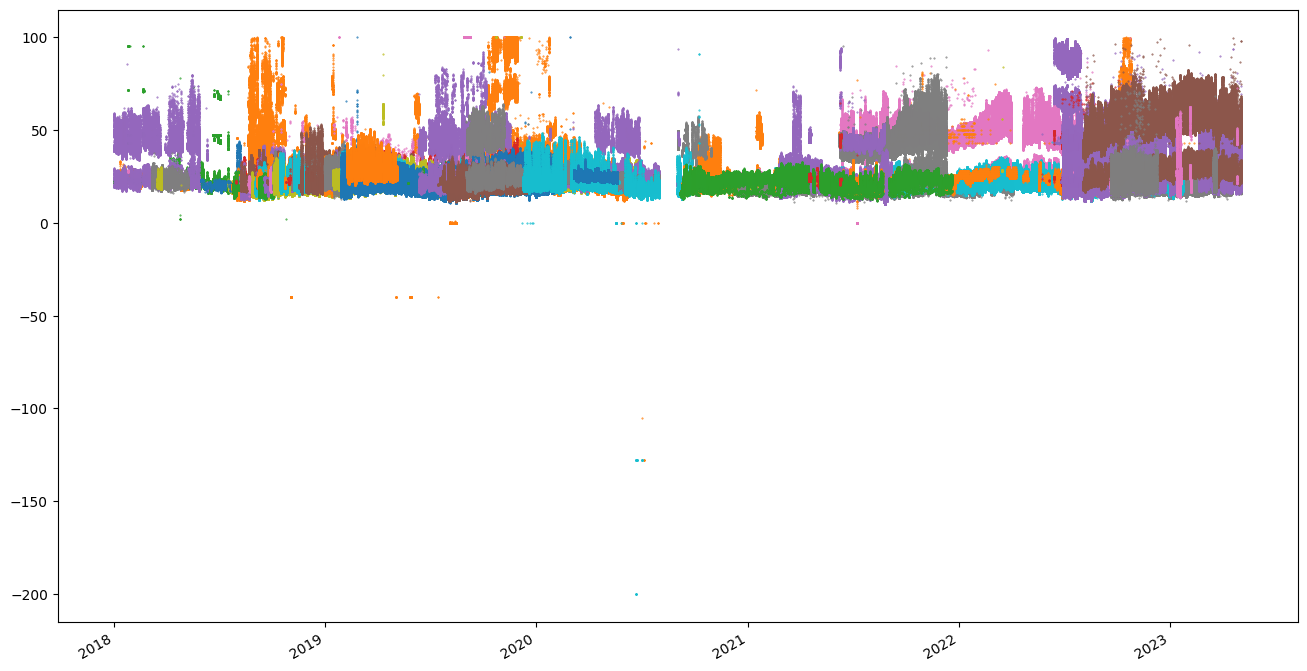

In [29]:
fig = plt.figure('temperature', figsize=(16,9))

for location in list(set(df['location'])):
    temperature = df.loc[df['location'] == location][['temperature','timestamp']]
    plt.scatter(temperature.timestamp,temperature.temperature,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## Humidity

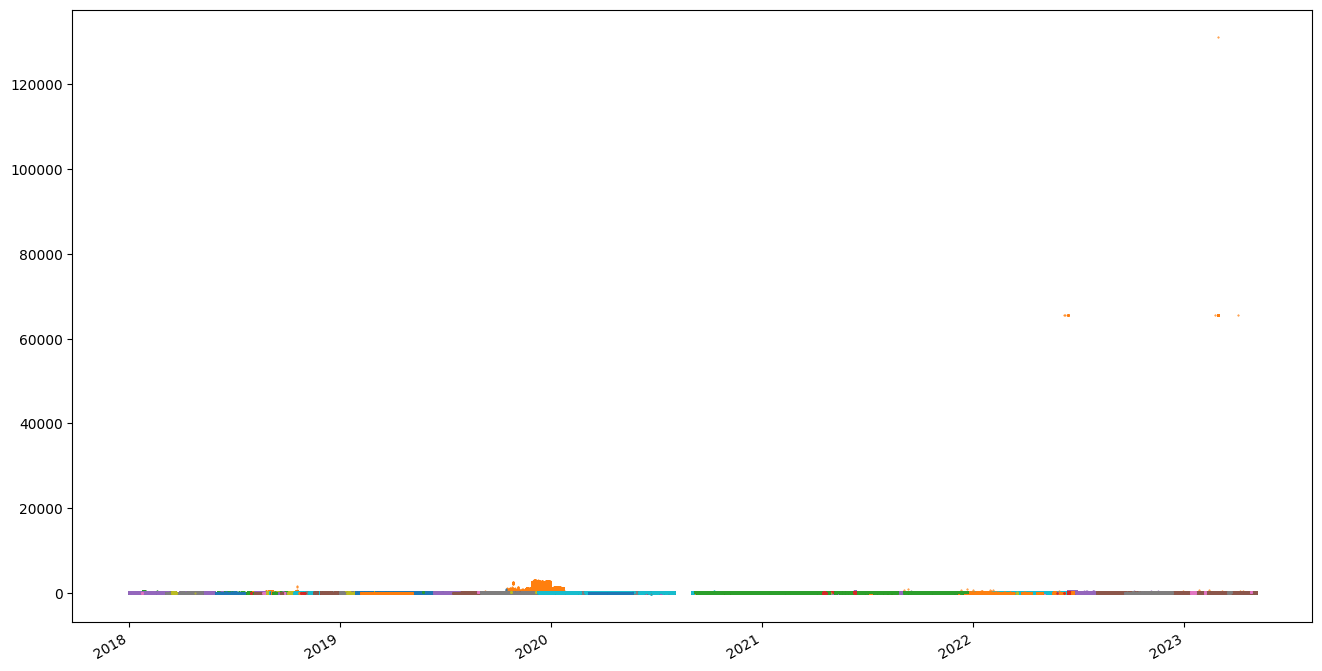

In [30]:
fig = plt.figure('humidity', figsize=(16,9))

for location in list(set(df['location'])):
    humidity = df.loc[df['location'] == location][['humidity','timestamp']]
    plt.scatter(humidity.timestamp,humidity.humidity,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## P0

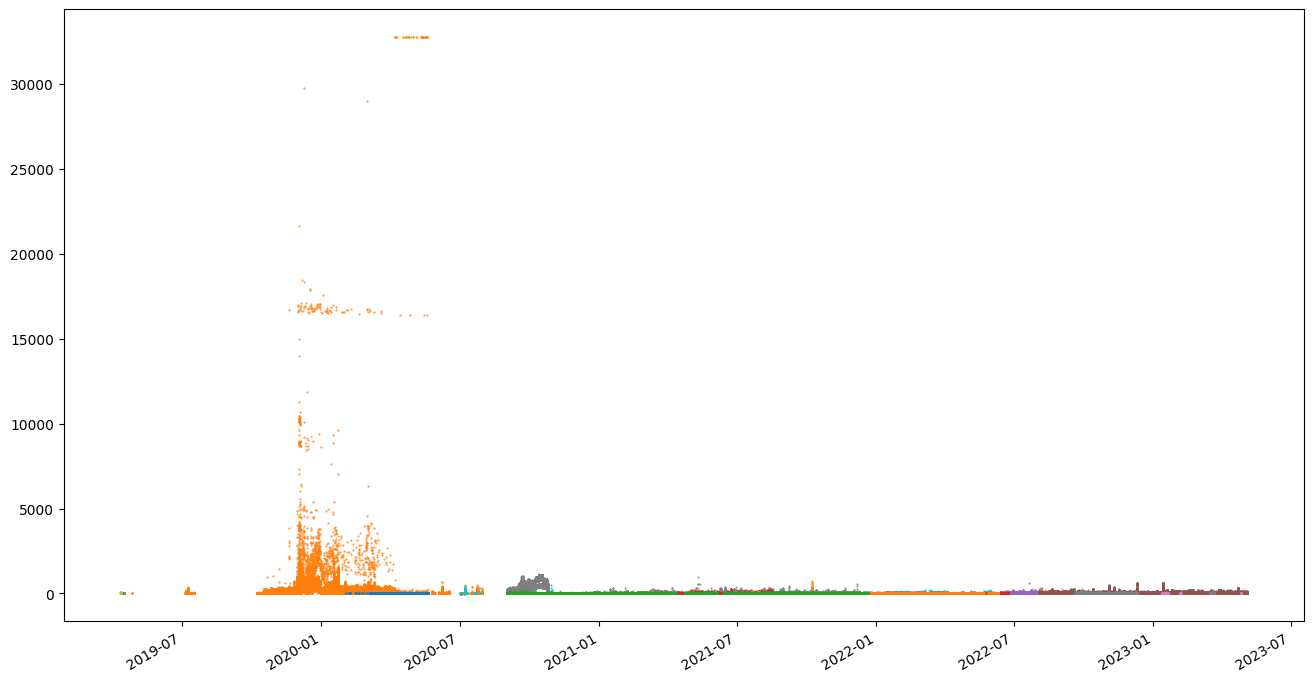

In [31]:
fig = plt.figure('P0', figsize=(16,9))

for location in list(set(df['location'])):
    P0 = df.loc[df['location'] == location][['P0','timestamp']]
    plt.scatter(P0.timestamp,P0.P0,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## P1

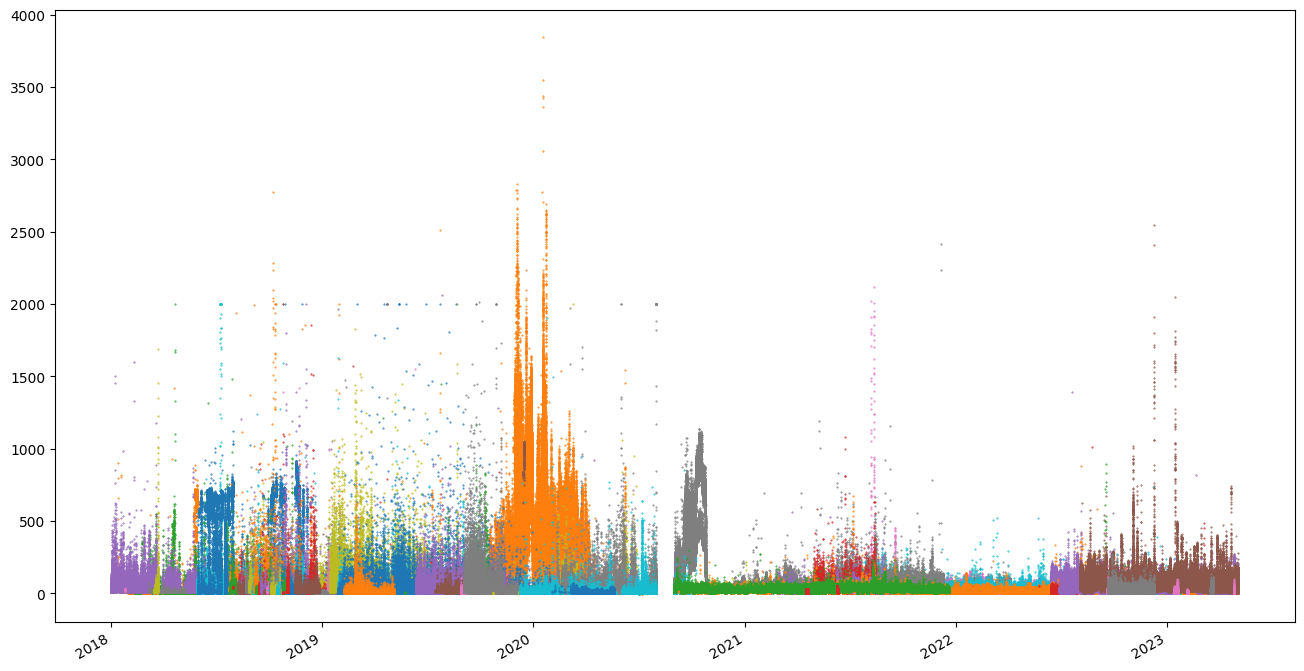

In [32]:
fig = plt.figure('P1', figsize=(16,9))

for location in list(set(df['location'])):
    P1 = df.loc[df['location'] == location][['P1','timestamp']]
    plt.scatter(P1.timestamp,P1.P1,s=0.2,label=location)

plt.gcf().autofmt_xdate()

## P2

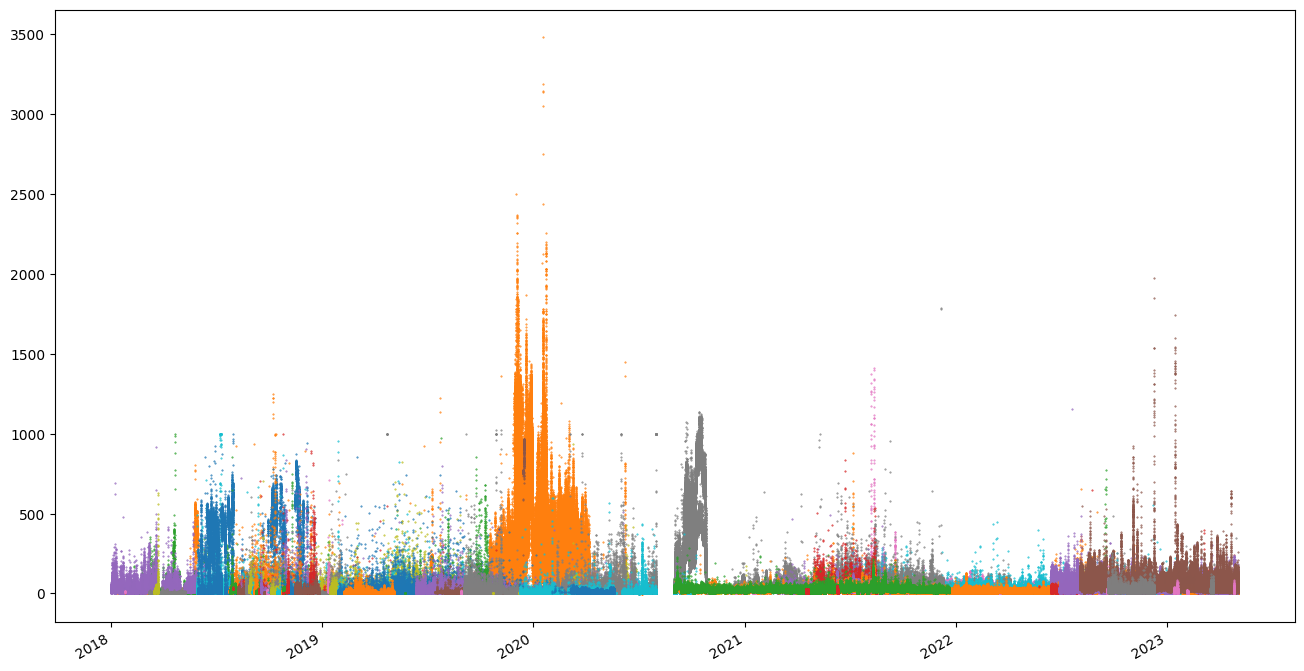

In [33]:
fig = plt.figure('P2', figsize=(16,9))

for location in list(set(df['location'])):
    P2 = df.loc[df['location'] == location][['P2','timestamp']]
    plt.scatter(P2.timestamp,P2.P2,s=0.2,label=location)

plt.gcf().autofmt_xdate()